In [1]:
import numpy as np
import scipy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

$$
f(x) = a e^{-\frac 1 2 \left( \frac{x-b}{c} \right)^2}
$$

In [2]:
# a -> height
# b -> location
# c -> std/scale
def f(x, a, b, c):
    return a * np.exp(-(x - b) ** 2 / 2 / c ** 2)

## `curve_fit`简单示例

In [3]:
# f(x, 1, 0, 1)
def g(x):
    return np.exp(-(x) ** 2 / 2 ** 2)

xs = np.linspace(-4, 4, 30)
ys = g(xs)

popt, _ = curve_fit(f, xs, ys)
print(popt)

[1.00000000e+00 5.22105953e-09 1.41421356e+00]


## 实际使用

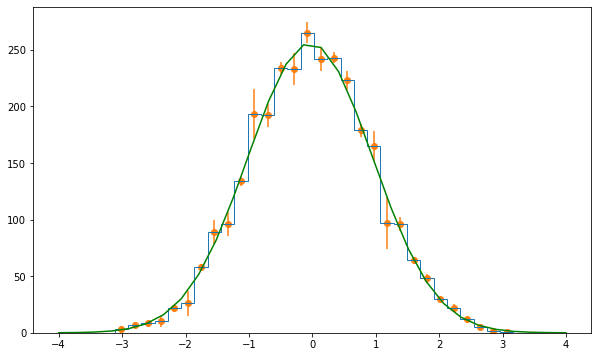

In [4]:
# 获取样本
np.random.seed(0)
samples = np.random.normal(size=3000)
plt.figure(figsize=(10, 6))

# 用直方图统计频次、并获取bins的中点
ys, edges, _ = plt.hist(samples, 30, histtype='step')
xs = (edges[:-1] + edges[1:]) / 2
plt.scatter(xs, ys, c='tab:orange')

# 拟合并作出相应的曲线
args, _ = curve_fit(f, xs, ys)
xxs = np.linspace(-4, 4, 30)
plt.plot(xxs, f(xxs, *args), c='g')

# 作errorbar图像
yhats = f(xs, *args)
yerrs = yhats - ys 
plt.errorbar(xs, ys, yerrs, fmt='none', ecolor='tab:orange')

plt.show()

## 方差计算

In [5]:
data = np.arange(3)
var = np.var(data)
print(var)

0.6666666666666666
